In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

In [2]:
df = pd.read_csv ('Data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#The total number of df rows
len(df.index)

48842

# Dropping Missing Data

In [4]:
#Replace ? to NA
df = df.replace(['?'], np.nan)
#Count missing value
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
# Calculate the percentage of the missing value of the total data
presen_na = df.isnull().values.sum() / len(df.index)*100
print('Missing Data presentage: ', '%.2f'%presen_na, '%')

Missing Data presentage:  13.24 %


In [6]:
#All missing data are in category column
#Because missing data are fewer and the data size is large, the missing will be dropped
df = df.dropna()

In [7]:
#Remove fnlwgt, educational-num, capital-gain, capital-loss since they are useless features
df = df.drop(columns=['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


 # Fequency Table for Categorary Data

In [8]:
#Frequency tables can show the influence of each attribute, which can strongly affect the income variable
df_category=("workclass","education","marital-status","occupation","relationship","race","gender", 'native-country')
for i in df_category:
    print(pd.crosstab(df['income'], df[i]), '\n')

workclass  Federal-gov  Local-gov  Private  Self-emp-inc  Self-emp-not-inc  \
income                                                                       
<=50K              857       2185    26056           734              2737   
>50K               549        915     7251           912              1059   

workclass  State-gov  Without-pay  
income                             
<=50K           1426           19  
>50K             520            2   

education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
income                                                                    
<=50K      1141  1530   534      214      427      768  638        1109   
>50K         82    89    43        8       22       55   38         398   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
income                                                                    
<=50K           1455       4392        145    12367     1121         71   
>50K           

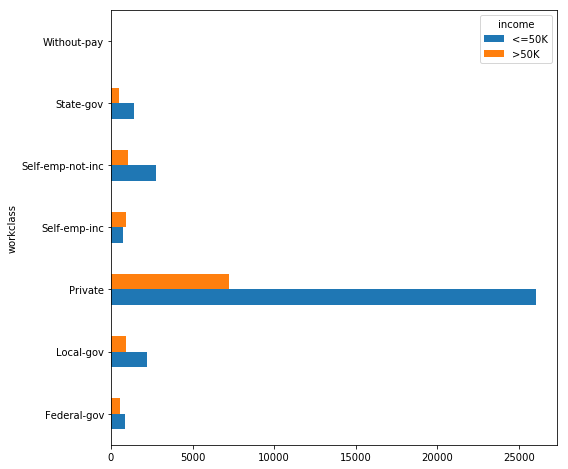

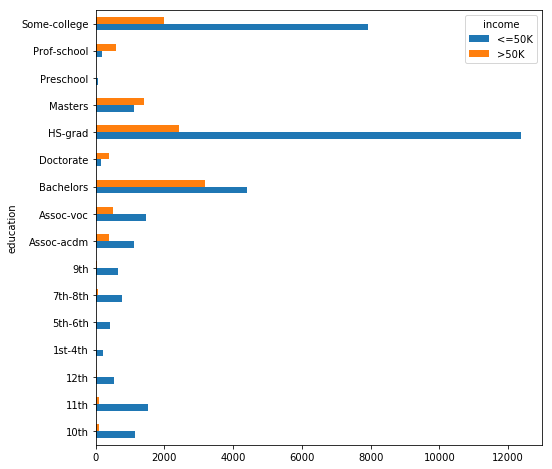

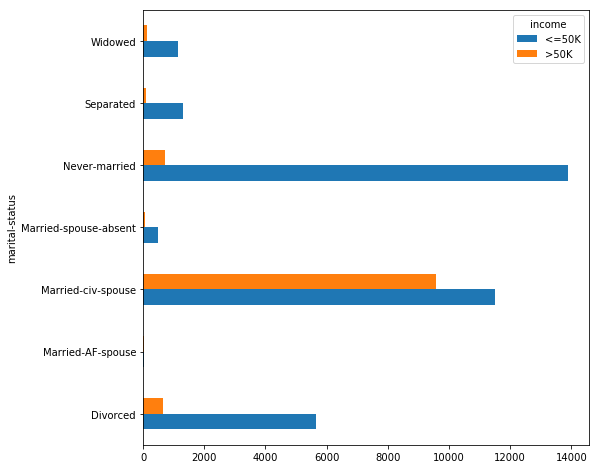

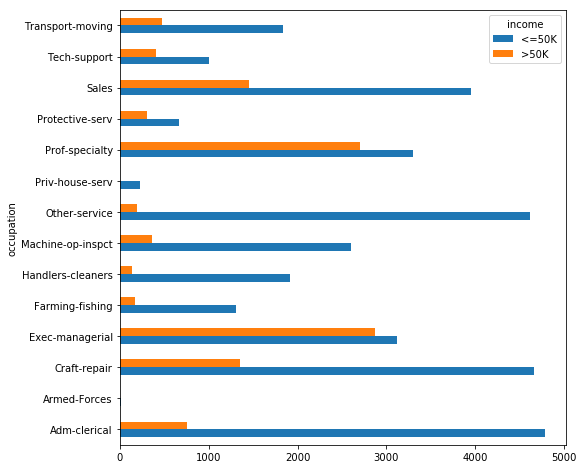

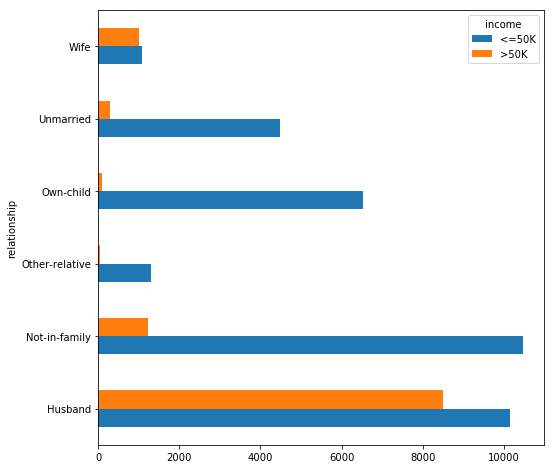

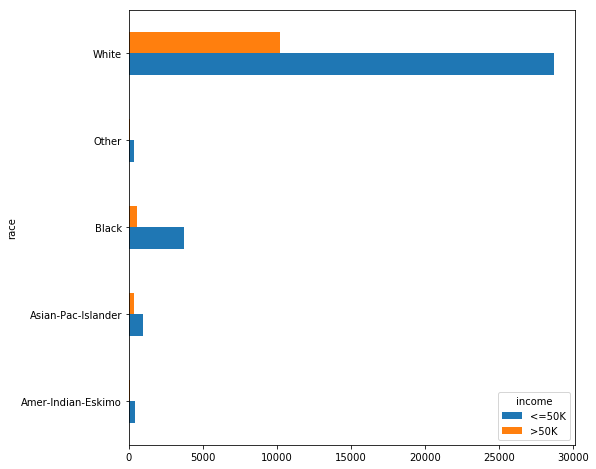

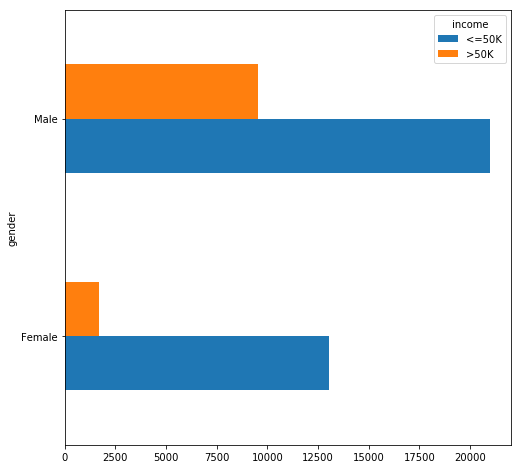

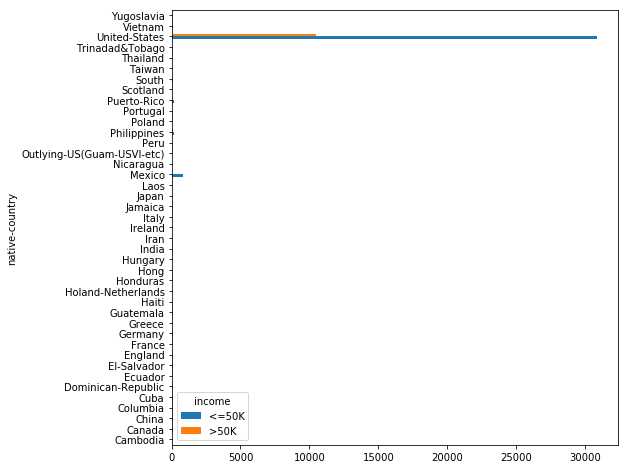

In [9]:
#Shows the influence of each attribute in multiple bar chart
df_category=("workclass","education","marital-status","occupation","relationship","race","gender", 'native-country')
for i in df_category:
    pd.crosstab(df[i],df['income']).plot(kind='barh',figsize=(8,8))
    plt.show()

#### Descriptive Statistic for Numeric Data

In [10]:
#Find the distribution of numeric data "age", mean is greater than medium, so it is positively skewed.
df_age=df['age']
print(df_age.describe()) 

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


In [11]:
#According to the above of fequency table, many people's native country is US. To avoide the model bias, native-country is dropped.
df = df.drop(columns=['native-country'])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,<=50K


# Label Enconding

In [12]:
noc=df
df_category=("workclass","education","marital-status","occupation","relationship","race","gender", "income")
for i in df_category:
    noc[i] = df[i].astype('category').cat.codes
    
noc.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,2,1,4,6,3,2,1,40,0
1,38,2,11,2,4,0,4,1,50,0
2,28,1,7,2,10,0,4,1,40,1
3,44,2,15,2,6,0,2,1,40,1
5,34,2,0,4,7,1,4,1,30,0


# Split Training Data and Testing Data

In [15]:
X=noc.iloc[:,:-1]
y=noc.iloc[:,-1]

In [16]:
 # Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (27133, 9) (27133,)
Testing set shape:  (18089, 9) (18089,)


In [17]:
X_train.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week
36117,34,2,11,2,6,5,4,0,40
15431,20,2,1,4,7,3,2,1,40
41783,17,2,6,4,7,3,2,0,40
27578,52,2,3,2,2,0,3,1,50
45788,19,5,15,4,7,3,4,1,10


# Feature Selection

In [18]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
# Get the two best(k = 5) features using the SelectKBest method
selector = SelectKBest(f_classif, k = 5).fit(X_train, y_train)

df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X_train.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(9,'Score'))

     Feature_Name        Score
5    relationship  1870.224591
0             age  1590.303752
8  hours-per-week  1495.267682
7          gender  1325.216753
3  marital-status  1049.247673
2       education   161.921670
6            race   143.031896
4      occupation    94.826753
1       workclass     2.800293


In [19]:
#Since relationship, hours-per-week, age, gender, martial-status are the most score, feature selection will be selected them.
#Drop race, occupation and workclass
X_train = X_train.drop(columns=['education', 'race', 'occupation', 'workclass'])
X_test = X_test.drop(columns=['education', 'race', 'occupation', 'workclass']) 
X_train.head()

,age,marital-status,relationship,gender,hours-per-week
36117,34,2,5,0,40
15431,20,4,3,1,40
41783,17,4,3,0,40
27578,52,2,0,1,50
45788,19,4,3,1,10


# Model

In [20]:
# Prepare to compared score
score = dict()

## Naïve Bayes Classifier

In [21]:
from sklearn.metrics import accuracy_score

gaussian_model = GaussianNB().fit(X_train, y_train)
nb_score = accuracy_score(y_test, gaussian_model.predict(X_test))
print('Accuracy: %f' % nb_score)

score['NB'] = nb_score

Accuracy: 0.741832


##  Logistic Regression

In [22]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit_regularized()
print(result.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5059271435579638
            Iterations: 24
            Function evaluations: 30
            Gradient evaluations: 24
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                27133
Model:                          Logit   Df Residuals:                    27128
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 May 2021   Pseudo R-squ.:                 0.09216
Time:                        14:08:47   Log-Likelihood:                -13727.
converged:                       True   LL-Null:                       -15121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [24]:
#Since the p-value of gender > 0.05, gender is removed
logi_x_train = X_train.drop(columns=['gender'])
logi_x_test = X_test.drop(columns=['gender'])

logit_model=sm.Logit(y_train,logi_x_train)
result=logit_model.fit_regularized()
print(result.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5059420301115591
            Iterations: 13
            Function evaluations: 19
            Gradient evaluations: 13
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                27133
Model:                          Logit   Df Residuals:                    27129
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 May 2021   Pseudo R-squ.:                 0.09214
Time:                        14:08:47   Log-Likelihood:                -13728.
converged:                       True   LL-Null:                       -15121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [25]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

predictions = result.predict(logi_x_test) 
def func(x):     
    if x < 0.5:         
        return 0     
    else:         
        return 1 
predictions = predictions.apply(func) 

confusion_table = confusion_matrix(y_test, predictions) 
logi_score = accuracy_score(y_test, predictions)

print ("Confusion Matrix : \n", confusion_table)
print('Test accuracy = ', logi_score)

score['LR'] = logi_score

Confusion Matrix : 
 [[13525    16]
 [ 4542     6]]
Test accuracy =  0.7480236607883244


## K-Nearest Neighbors

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(noc.drop('income',axis=1))
scaled_features = scaler.transform(df.drop('income',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=noc.columns[:-1])
df_feat.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week
0,0.109589,0.333333,0.066667,0.666667,0.461538,0.6,0.5,1.0,0.397959
1,0.287671,0.333333,0.733333,0.333333,0.307692,0.0,1.0,1.0,0.500000
2,0.150685,0.166667,0.466667,0.333333,0.769231,0.0,1.0,1.0,0.397959
3,0.369863,0.333333,1.000000,0.333333,0.461538,0.0,0.5,1.0,0.397959
4,0.232877,0.333333,0.000000,0.666667,0.538462,0.2,1.0,1.0,0.295918


In [28]:
from sklearn.preprocessing import MinMaxScaler

X_train_2 = MinMaxScaler().fit(X_train).transform(X_train.astype(float))
X_test_2 = MinMaxScaler().fit(X_test).transform(X_test.astype(float))

X_train2_df = pd.DataFrame(X_train_2,columns=X_train.columns)
X_test2_df = pd.DataFrame(X_test_2,columns=X_test.columns)

X_test2_df.head()

,age,marital-status,relationship,gender,hours-per-week
0,0.493151,0.000000,0.8,0.0,0.397959
1,0.246575,0.666667,0.2,0.0,0.653061
2,0.123288,0.333333,0.0,1.0,0.704082
3,0.287671,0.000000,0.2,1.0,0.448980
4,0.164384,0.666667,0.2,1.0,0.500000


Text(0,0.5,'Error Rate')

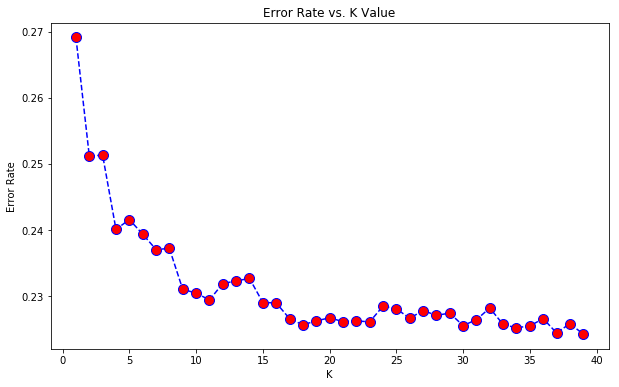

In [29]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train2_df,y_train)
    pred_i = knn.predict(X_test2_df)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train2_df, y_train)
pred = knn.predict(X_test2_df)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred)) 

score['KNN'] = accuracy_score(y_test, pred)


WITH K=18


[[12116  1425]
 [ 2657  1891]]


              precision    recall  f1-score   support

           0       0.82      0.89      0.86     13541
           1       0.57      0.42      0.48      4548

    accuracy                           0.77     18089
   macro avg       0.70      0.66      0.67     18089
weighted avg       0.76      0.77      0.76     18089



## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [33]:
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", tree_score)
score['DecisionTree'] = tree_score

Accuracy: 0.7604068771076344


## Stochastic Gradient Descent

In [34]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='modified_huber',shuffle=True, random_state=0)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)

In [35]:
sgd_score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", sgd_score)
score['SGD'] = sgd_score

Accuracy: 0.7214329150312344


# Conculsion

In [36]:
print(score)

{'NB': 0.7418320526286694, 'LR': 0.7480236607883244, 'KNN': 0.7743379954668583, 'DecisionTree': 0.7604068771076344, 'SGD': 0.7214329150312344}


In [37]:
#Finding the highest score feature
import operator
max(score.items(), key=operator.itemgetter(1))[0]

'KNN'